In [1]:
import time
start_time = time.perf_counter()

## Versions, housekeeping

In [2]:
%matplotlib inline
# version check
import numpy
print('The numpy version is {}.'.format(numpy.__version__))
import pandas
print('The pandas version is {}.'.format(pandas.__version__))
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import matplotlib
print('The matplotlib version is {}.'.format(matplotlib.__version__))
import regex
print('The regex version is {}.'.format(regex.__version__))
import scipy
print('The scipy version is {}.'.format(scipy.__version__))

The numpy version is 1.18.1.
The pandas version is 1.0.4.
The scikit-learn version is 0.23.1.
The matplotlib version is 3.2.1.
The regex version is 2.5.80.
The scipy version is 1.4.1.


In [3]:
# set random state for reproducibility
random_state = 42

# default numpy settings
import numpy as np
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 80

# update settings
import numpy as np
np.set_printoptions(edgeitems=15, linewidth=150, 
    formatter=dict(float=lambda x: "%.2f" % x))

# update pandas settings
import pandas as pd
pd.set_option('max_colwidth', 50)
pd.options.display.max_columns = 25
pd.options.display.max_rows = 150
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# system
import sys
#sys.getsizeof

# timeit
import timeit

In [4]:
# plotting functions
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("notebook")

def get_character_counts(df, col='m_body', new_name='n_char'):
    A = np.array(df.loc[:, col]) 
    getlength = np.vectorize(len)
    df[new_name] = getlength(A)
    return df

def plot_ecdf(x, xlab='', ylab='', title='', color=None, xlim=None, ylim=None, logx=False, logy=False, hline=None, vline=None, alpha=1, s=1):
    x = np.sort(x)
    n = x.size
    y = np.arange(1, n+1) / n
    plt.scatter(x, y, color=color, s=s, alpha=alpha)
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    if logx == True:
        plt.xscale('log')
    if logy == True:
        plt.yscale('log')
    if hline is not None:
        plt.axhline(hline, color='r', linestyle='--')
    if vline is not None:
        plt.axvline(vline, color='r', linestyle='--')

def plot_scatter(x, y, xlab='', ylab='', title='', logx=False, logy=False, hline=None, vline=None, s=None):
    plt.scatter(x, y, alpha=0.25)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    if logx == True:
        plt.xscale('log')
    if logy == True:
        plt.yscale('log')
    if hline is not None:
        plt.axhline(hline, color='r', linestyle='--')
    if vline is not None:
        plt.axvline(vline, color='r', linestyle='--')

def plot_2_2(x, y, suptitle='', hline=None, vline=None):
    plt.figure(figsize=(10,10))

    plt.subplot(2, 2, 1)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 1: linx, liny', logx=False, logy=False, hline=None, vline=None)
    plt.subplot(2, 2, 2)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 2: linx, logy', logx=False, logy=True, hline=None, vline=None)
    plt.subplot(2, 2, 3)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 3: linx, liny', logx=True, logy=False, hline=None, vline=None)
    plt.subplot(2, 2, 4)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 4: linx, logy', logx=True, logy=True, hline=None, vline=None)

    plt.suptitle(suptitle, fontsize=16)
    plt.show() 

def plot_2_4(_, suptitle='', hline=None, vline=None):
    plt.figure(figsize=(20,10))

    plt.subplot(2, 4, 1)
    _.plot(kind='hist', bins=30, title='Plot 1: linx, liny', logx=False, logy=False)
    plt.subplot(2, 4, 2)
    _.plot(kind='hist', bins=30, title='Plot 2: linx, logy', logx=False, logy=True)
    plt.subplot(2, 4, 3)
    plot_ecdf(_, xlab='', ylab='', title='Plot 3: linx, liny', logx=False, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 4)
    plot_ecdf(_, xlab='', ylab='', title='Plot 4: linx, logy', logx=False, logy=True, hline=None, vline=None)
    plt.subplot(2, 4, 5)
    _.plot(kind='hist', bins=30, title='Plot 5: logx, liny', logx=True, logy=False)
    plt.subplot(2, 4, 6)
    _.plot(kind='hist', bins=30, title='Plot 6: logx, logy', logx=True, logy=True)
    plt.subplot(2, 4, 7)
    plot_ecdf(_, xlab='', ylab='', title='Plot 7: logx, liny', logx=True, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 8)
    plot_ecdf(_, xlab='', ylab='', title='Plot 8: logx, logy', logx=True, logy=True, hline=None, vline=None)
    plt.suptitle(suptitle, fontsize=16)
    plt.show()   

    
def plot_sender_stats(df, n, suptitle=''):
    plt.figure(figsize=(14, 12))
    plt.subplot(2, 2, 1) # plot 1: horizontal bar
    _ = pd.DataFrame(df.groupby(['m_from']).size()).sort_values(0,ascending=False).reset_index() # convert data
    l = np.array(_.iloc[:,0]) # labels
    v = np.array(_.iloc[:,1]) # values
    plt.barh(np.linspace(n,1,n), v[:n], tick_label=l[:n])
    plt.subplot(2, 2, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(2, 2, 3) # plot 3: pie
    pie_x = [len(df[df.gender == 0].m_from.unique()), len(df[df.gender == 1].m_from.unique())]
    pie_lab = ['boy: %d email addresses' % (pie_x[0]), 'girl: %d email addresses' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(2, 2, 4) # plot 4: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.suptitle(suptitle)
    plt.show()
    print(_.describe())
    print(stats.describe(v))
    
def plot_character_frequency(df, suptitle=''):
    v = np.array(df.n_characters_start.values) # values
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1) # plot 1: pie chart
    pie_x = [df[df.gender == 0].n_characters_start.sum(),df[df.gender == 1].n_characters_start.sum()]
    pie_lab = ['boy: %.3g characters' % (pie_x[0]), 'girl: %.3g characters' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(1, 3, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(1, 3, 3) # plot 3: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.show()
    print(df.n_characters_start.describe())
    print(stats.describe(v))
    

    
def plot_gender_character_frequency(df, suptitle='', alpha=0.1, col='m_body', new_name='n_char'):
    df = get_character_counts(df)
    bv = np.array(df[df.gender == 0][new_name].values) # values
    gv = np.array(df[df.gender == 1][new_name].values) # values
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1) # plot 1: pie chart
    pie_x = [np.sum(bv), np.sum(gv)]
    pie_lab = ['boy: %dM characters' % (pie_x[0]/1000000), 'girl: %dM characters' % (pie_x[1]/1000000)]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(1, 3, 2) # plot 2: full histogram
    plt.hist(x=[bv, gv], bins=10, color=['#347DC1', '#FF85A2'], rwidth=1,)
    #plt.hist(gv, bins=30, color='#FF85A2')
    plt.yscale('log')
    plt.subplot(1, 3, 3) # plot 3: ecdf
    plot_ecdf(bv, xlim=(0,stats.scoreatpercentile(bv,97)), color='#347DC1', alpha=.5, s=.1)
    plot_ecdf(gv, xlim=(0,stats.scoreatpercentile(gv,97)), color='#FF85A2', alpha=.25, s=.1)
    plt.show()
    bd = df[df.gender == 0].n_characters_start.describe()
    bd.name = 'boy'
    gd = df[df.gender == 1].n_characters_start.describe()
    gd.name = 'girl'
    bg_describe = pd.concat([bd, gd], axis=1)
    print(bg_describe)

# CLEAN DATA
After looking at the data, let's explore some avenues for filtering to clean up the data:



## Import dataframe

In [5]:
df = pd.read_csv('./data/enron/visualize_initial_data.csv', index_col=0)

C:\Users\james\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head(2)

,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,o_body,m_body,gender,n_emails_sent,n_characters_start
0,./data/enron/maildir/allen-p/_sent_mail/1,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast\n\n,0.00,2195,23
1,./data/enron/maildir/allen-p/_sent_mail/10,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,0.00,2195,786


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517401 entries, 0 to 517400
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   f_dir               517401 non-null  object 
 1   m_id                517401 non-null  object 
 2   m_date              517401 non-null  object 
 3   m_from              517401 non-null  object 
 4   m_to                496355 non-null  object 
 5   m_cc                135166 non-null  object 
 6   m_bcc               127886 non-null  object 
 7   m_subj              498214 non-null  object 
 8   mime_vers           517401 non-null  float64
 9   cont_type           517401 non-null  object 
 10  encode              517401 non-null  object 
 11  x_from              517401 non-null  object 
 12  x_to                508255 non-null  object 
 13  x_cc                128886 non-null  object 
 14  x_bcc               175 non-null     object 
 15  x_fold              517401 non-nul

## Create a Filter Dictionary
Let's track the impact of each filter as we explore the dataframes.

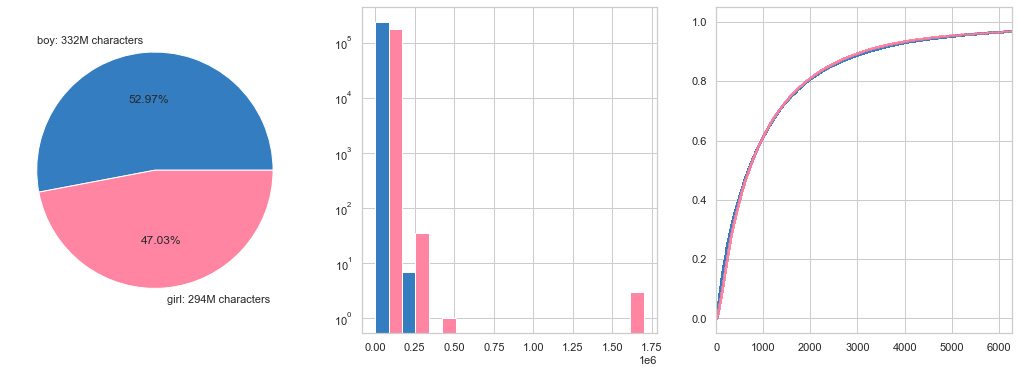

            boy       girl
count 235804.00  174119.00
mean    1408.53    1693.43
std     3325.31    9332.59
min        1.00       1.00
25%      231.00     279.00
50%      670.00     684.00
75%     1585.00    1560.00
max   248665.00 1697165.00


In [8]:
filt_dict = {}
plot_gender_character_frequency(df)

## Remove NaN from Gender

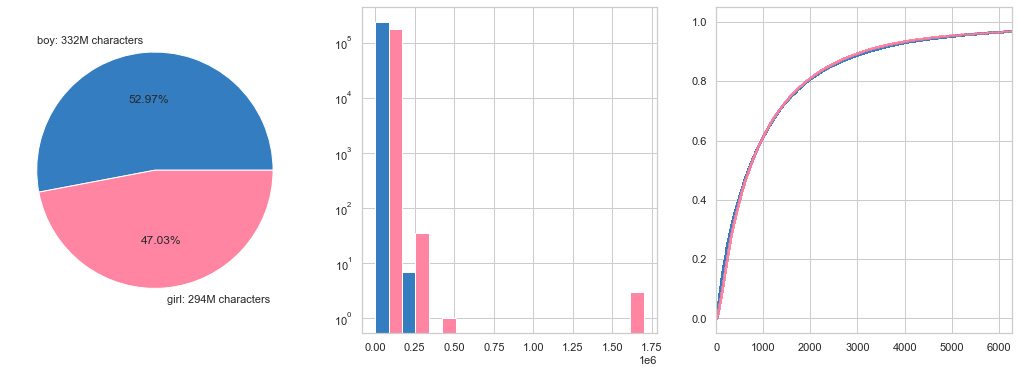

            boy       girl
count 235804.00  174119.00
mean    1408.53    1693.43
std     3325.31    9332.59
min        1.00       1.00
25%      231.00     279.00
50%      670.00     684.00
75%     1585.00    1560.00
max   248665.00 1697165.00


In [9]:
filt_dict['remove_gender_nan'] = len(df[(df.gender.notna())])
plot_gender_character_frequency(df[(df.gender.notna())].copy())

## Drop Duplicates from Message Body

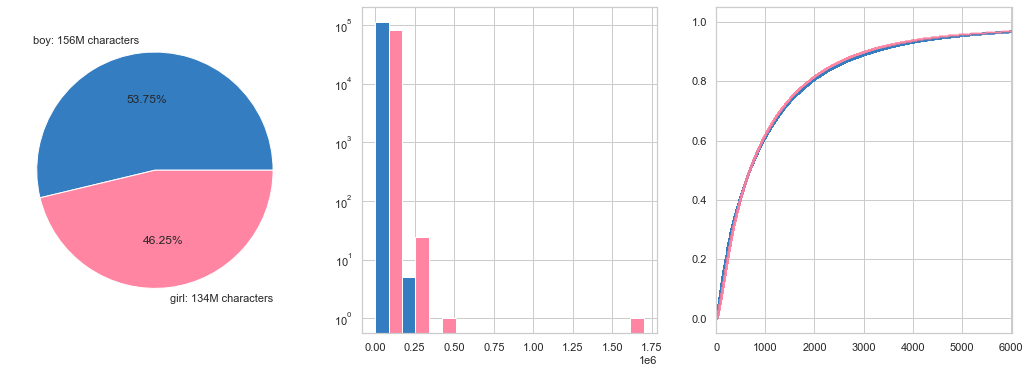

            boy       girl
count 111795.00   81859.00
mean    1403.42    1649.06
std     3366.17    8839.65
min        1.00       1.00
25%      241.00     276.00
50%      676.00     674.00
75%     1598.00    1535.00
max   248665.00 1697165.00


In [10]:
filt_dict['drop_body_duplicates'] = len(df[~df.m_body.duplicated()])
plot_gender_character_frequency(df[~df.m_body.duplicated()].copy())

## Filter out non-enron sender addresses

In [11]:
filt_dict['non_enron_senders'] = len(df[df.m_from.str.contains('@enron')])

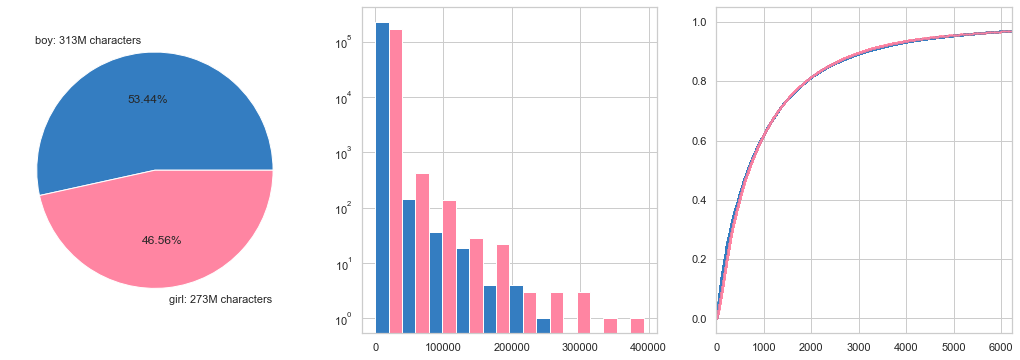

            boy      girl
count 227432.00 169164.00
mean    1380.51   1617.30
std     3301.21   5680.14
min        1.00      1.00
25%      225.00    276.00
50%      658.00    678.00
75%     1557.00   1549.00
max   248665.00 392883.00


In [12]:
plot_gender_character_frequency(df[df.m_from.str.contains('@enron')].copy())

## Filter out 'Copyright'
Combining capitalization with the word boundary '\b' shows that we can catch a chunk of new articles by their copyright tags.


In [13]:
filt_dict['copyright_articles'] = len(df[~df.m_body.str.contains(r'Copyright\b')])

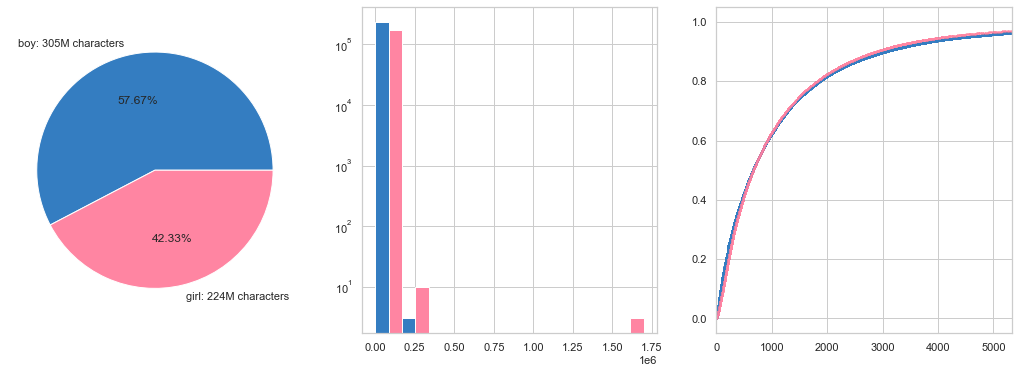

            boy       girl
count 233513.00  171661.00
mean    1309.80    1307.81
std     2551.49    7675.26
min        1.00       1.00
25%      227.00     275.00
50%      659.00     667.00
75%     1541.00    1505.00
max   248665.00 1697165.00


In [14]:
plot_gender_character_frequency(df[~df.m_body.str.contains(r'Copyright\b')].copy())

## Remove Server Messages
A series of automatically generated server reports are isolated by capturing the pattern, "Start Date:...HourAhead hour:"

In [15]:
%%time
pattern = r'Start Date:.+?HourAhead hour:'
filt_dict['server_reports'] = len(df[~df['m_body'].str.contains(pattern)])

Wall time: 1.12 s


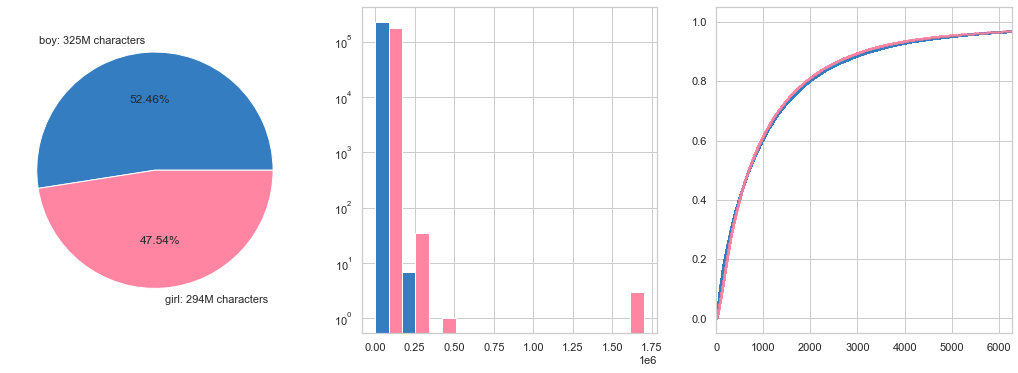

            boy       girl
count 226735.00  174117.00
mean    1435.10    1693.43
std     3375.09    9332.65
min        1.00       1.00
25%      241.00     279.00
50%      690.00     684.00
75%     1633.00    1560.00
max   248665.00 1697165.00
Wall time: 2.62 s


In [16]:
%%time
plot_gender_character_frequency(df[~df['m_body'].str.contains(pattern)].copy())

## Looking at the filter numbers

In [17]:
filter_labels = []
filter_values = []
for k, v in filt_dict.items():
    filter_labels.append(k)
    filter_values.append(v)
filter_values = [len(df)-cnt for cnt in filter_values]
z_these = sorted(zip(filter_values, filter_labels))
filter_values, filter_labels = zip(*z_these)

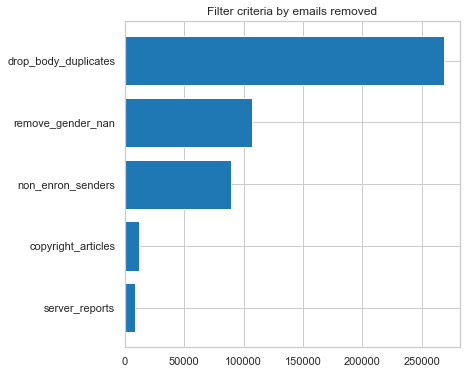

In [18]:
plt.figure(figsize=(6,6))
plt.barh(np.linspace(1,len(filter_values),len(filter_values)), filter_values, tick_label=filter_labels)
plt.title('Filter criteria by emails removed')
plt.show()

## Apply filters

In [19]:
%%time
df = df[~df.m_body.duplicated()] # dupllicates
df = df[df.gender.notna()] # not NA
df = df[df.m_from.str.contains('@enron')] # only enron senders
df = df[~df.m_body.str.contains(r'Copyright\b')] # emails with 'Copyright '
df = df[~df.m_body.str.contains(r'Start Date:.+?HourAhead hour:')] # automated messages

Wall time: 1.15 s


In [20]:
len(df)

179994

### Resample, reindex

In [21]:
def resample_frame(df, random_state=random_state):
    df = df.sample(n=len(df), random_state=random_state).reset_index(drop=True)
    return df
df = resample_frame(df) # resampled

### Output

In [22]:
df.to_csv('./data/enron/clean_clean_by_filter.csv')

### End

In [23]:
end_time = time.perf_counter()
print('Run time: %.1fs (~%dm)' % ((end_time-start_time, (end_time-start_time)/60)))

Run time: 55.0s (~0m)
